## Data 02: Lakers data
Lakers는 미국 캘리포니아주 LA를 연고로 하는 NBA 서부 컨퍼런스 퍼시픽 디비전 소속의 프로 농구팀
데이터 기준 : 2008 - 2009 시즌의 Lakers의 경기 기록
Data from : 패스트 캠퍼스

#### 1. 데이터 둘러보기

In [60]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/maplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [66]:
#기본 패키지 import
import math 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') # 나눔바른고딕 폰트 가져오기
plt.rcParams['font.family']='NanumBarunGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# 데이터 불러오기
df = pd.read_csv('./Lakers.csv')

In [4]:
# 데이터 확인
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


<컬럼 설명>
- Date : 경기 일자
- Opponent : 대전 팀
- game_type : 홈 VS 원정
- time : mm:ss
- period : Quater ( 1Q당 12m / 동점일 경우 5Q)
- etype: 행동유형 (ejection / foul / free throw / jump ball / rebound / shot / sub / timeout / timeover / violation )
- team : 상대 팀 구분
- Player : 선수명
- Result : 결과
- Point : 점수
- Type : 세부행동
- X, Y : 상대편 팀 골대 뒤에서 바라본 X,Y 좌표. 골대 위치는 ( 25,5.25 )


In [5]:
# 데이터 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


- 범주형 변수 : 빈도 계산 가능
> opponent, game_type, period, etype, team, player, result, type

- 연속형 변수 : 평균, 표준편차, min/max 등 수치 계싼 가능
> date, time, result, x, y

In [7]:
# 연속형(수치) 데이터의 통계치 확인하기
df.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [8]:
# 범주형 데이터의 통계치 확인하기
df.describe(include=np.object_)

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [29]:
# 각 컬럼 별 내용 확인
df['opponent'].unique()

array(['POR', 'LAC', 'DEN', 'HOU', 'DAL', 'DET', 'CHI', 'PHX', 'SAC',
       'NJN', 'TOR', 'IND', 'PHI', 'WAS', 'MIL', 'MIN', 'NYK', 'MIA',
       'ORL', 'MEM', 'NOH', 'BOS', 'UTA', 'GSW', 'SAS', 'CLE', 'OKC',
       'ATL', 'CHA'], dtype=object)

In [10]:
df['game_type'].unique()

array(['home', 'away'], dtype=object)

In [11]:
df['period'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [12]:
df['etype'].unique()

array(['jump ball', 'shot', 'rebound', 'foul', 'free throw', 'turnover',
       'timeout', 'sub', 'violation', 'ejection'], dtype=object)

In [13]:
df['team'].unique()

array(['OFF', 'LAL', 'POR', 'LAC', 'DEN', 'HOU', 'DAL', 'DET', 'CHI',
       'PHX', 'SAC', 'NJN', 'TOR', 'IND', 'PHI', 'WAS', 'MIL', 'MIN',
       'NYK', 'MIA', 'ORL', 'MEM', 'NOH', 'BOS', 'UTA', 'GSW', 'SAS',
       'CLE', 'OKC', 'ATL', 'CHA'], dtype=object)

In [14]:
df['result'].unique()

array([nan, 'missed', 'made'], dtype=object)

In [15]:
df['points'].unique()

array([0, 2, 1, 3], dtype=int64)

In [16]:
df['type'].unique()

array([nan, 'hook', 'off', 'layup', 'shooting', 'personal', 'jump',
       'pullup jump', 'def', 'driving layup', 'driving finger roll layup',
       'regular', 'offensive', '3pt', 'turnaround jump', 'putback layup',
       'slam dunk', 'tip', 'dunk', 'defensive goaltending', 'hook bank',
       'running layup', 'official', 'driving slam dunk', 'short',
       'driving reverse layup', 'kicked ball', 'putback dunk',
       'technical', 'alley oop dunk', 'turnaround fade away',
       'running jump', 'delay of game', 'defense 3 second',
       'fade away bank', 'floating jump', 'driving dunk', 'loose ball',
       'running bank', 'running dunk', 'fade away jumper',
       'finger roll layup', 'turnaround hook', 'reverse layup',
       'reverse dunk', 'jump hook', 'jump bank', 'double technical',
       'running hook', 'driving jump', 'turnaround bank',
       'step back jump', 'turnaround bank hook', 'pullup bank',
       'alley oop layup', 'putback slam dunk', 'flagrant type 1',
       

In [30]:
# 데이터 내용 정리 출력
print("총 데이터 개수 :",df.shape[0]*df.shape[1])
print("총 결측치 수 : {} = 전체 데이터의 {:.2f}% ".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))
print("Lakers와 경기한 팀 수 :", df['opponent'].nunique()-1)
print("경기에 등장하는 행동유형 수 : ", df['etype'].nunique())
print("경기에 등장하는 세부행동 수 :",df['type'].nunique())

총 데이터 개수 : 450112
총 결측치 수 : 76625 = 전체 데이터의 17.02% 
Lakers와 경기한 팀 수 : 28
경기에 등장하는 행동유형 수 :  10
경기에 등장하는 세부행동 수 : 73


In [27]:
df['opponent'].unique()

array(['POR', 'LAC', 'DEN', 'HOU', 'DAL', 'DET', 'CHI', 'PHX', 'SAC',
       'NJN', 'TOR', 'IND', 'PHI', 'WAS', 'MIL', 'MIN', 'NYK', 'MIA',
       'ORL', 'MEM', 'NOH', 'BOS', 'UTA', 'GSW', 'SAS', 'CLE', 'OKC',
       'ATL', 'CHA'], dtype=object)

### 2. 데이터에 질문 생성
- LA Lakers의 홈 경기 vs 원정 경기의 비율은? 
- 경기에서 선수들이 가장 많이 하는 행동유형(etype)은 ?
- 이번 시즌에서 Lakers의 경기 결과는 ?
- Lakers 선수들은 코트 어느 위치에서 어떤 동작을 했는가 ?

### 3. 데이터 정비하기

#### 3-1. 시간 타입의 컬럼 정비

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


In [36]:
# data컬럼은 int.64, time 컬럼은 object 타입이므로 각 타입을 변환 후 두 컬럼을 병합
df['date'] = df['date'].apply(str)
df['datetime'] = df['date'] + ' ' + df['time']
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [41]:
# datetime/date 컬럼을 날짜 타입으로 변경
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y%m%D %H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y%M%D')
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


#### 3-2. 결측치 처리

In [43]:
# Null 존재 컬럼 확인
df.isnull().any(axis=0)

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

In [44]:
# 컬럼의 특성마다 Null 처리 방법 고민
# Player, result, type은 object 값이 들어가있으므로 굳이 Null 값 채울 필요 없음
# x, y 컬럼들 Nan을 둬도 되지만 0 채우기 연습
# 0 을 채워 넣기 전, 실제 데이터에 0이 존재하는지 확인하기
print(df.index[df['x'] == '0'].tolist())
print(df.index[df['y'] == '1'].tolist())

[]
[]


In [45]:
# x,y 포지션에 0 채워넣기
df['x'].fillna(0, inplace=True)
df['y'].fillna(0, inplace=True)
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00


#### 4. EDA & Visualization

#### 4-1. 홈 경기 대 원정 경기의 비율

In [50]:
# 날짜 별로 홈 경기인지 원정경기 인지 확인하능 방법
df[['date','game_type']].groupby(['date','game_type']).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [51]:
# reset_index 함수로 정리
df[['date','game_type']].groupby(['date','game_type']).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [52]:
# 홈 경기대 원정 경기의 비율
df1 = df.drop_duplicates(['date'], keep='first')
df1

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-12 12:00:00


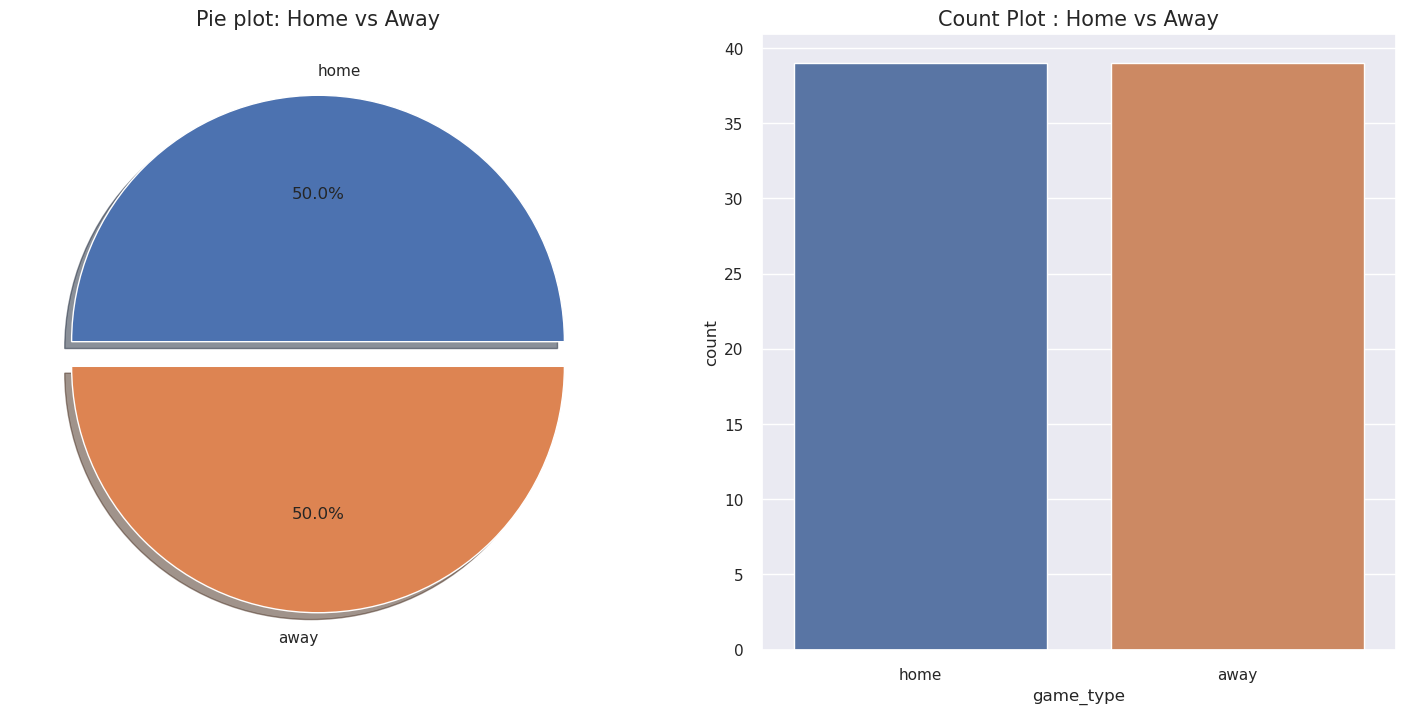

In [68]:
# 홈 경기 대 원정 경기의 비율 : 그래프로 표현
f, ax = plt.subplots(1, 2, figsize=(18,8))

# pie plot
df1['game_type'].value_counts().plot.pie(explode=[0, 0.1], autopct= '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot: Home vs Away',size=15)
ax[0].set_ylabel('') # y라벨 제거

# count plot
sns.countplot('game_type', data=df1, ax=ax[1])
ax[1].set_title('Count Plot : Home vs Away',size =15)
 
plt.show()

#### 4-2. 경기에서 발생한 행동 유형 확인하기

In [70]:
# 몇개의 행동 유형이 있는가?
df['etype'].nunique()

10

In [72]:
# 모든 경기를 포함해서 각각의 행동유형의 발생 수 세기
df['etype'].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

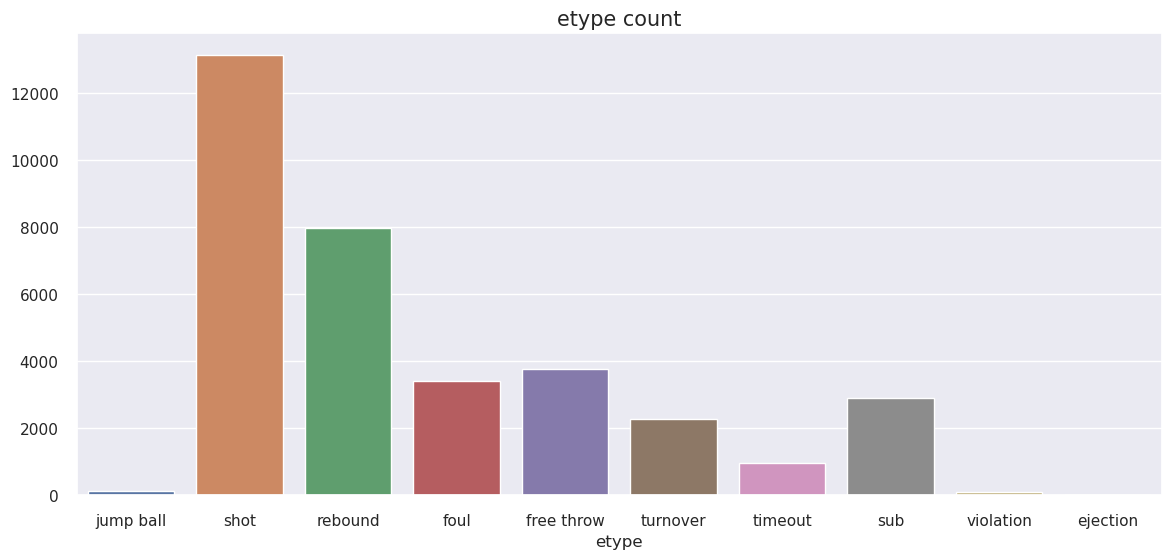

In [75]:
# 행동 유형 발생 횟수 그래프로 나타내기
f, ax = plt.subplots(1,1, figsize=(14,6))

sns.countplot(x=df['etype'], ax=ax)
ax.set_title('etype count', size=15)
ax.set_ylabel('')

plt.show()

In [77]:
# 특정 쿼터에서 많이 발생한 행동이 있을까? 
# groupby를 사용해서 각 쿼터별로 각각 행동이 몇 회 발생했는지 세보기
df2 = df.groupby(['etype','period']).size().reset_index().pivot(columns='period',index='etype',values=0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


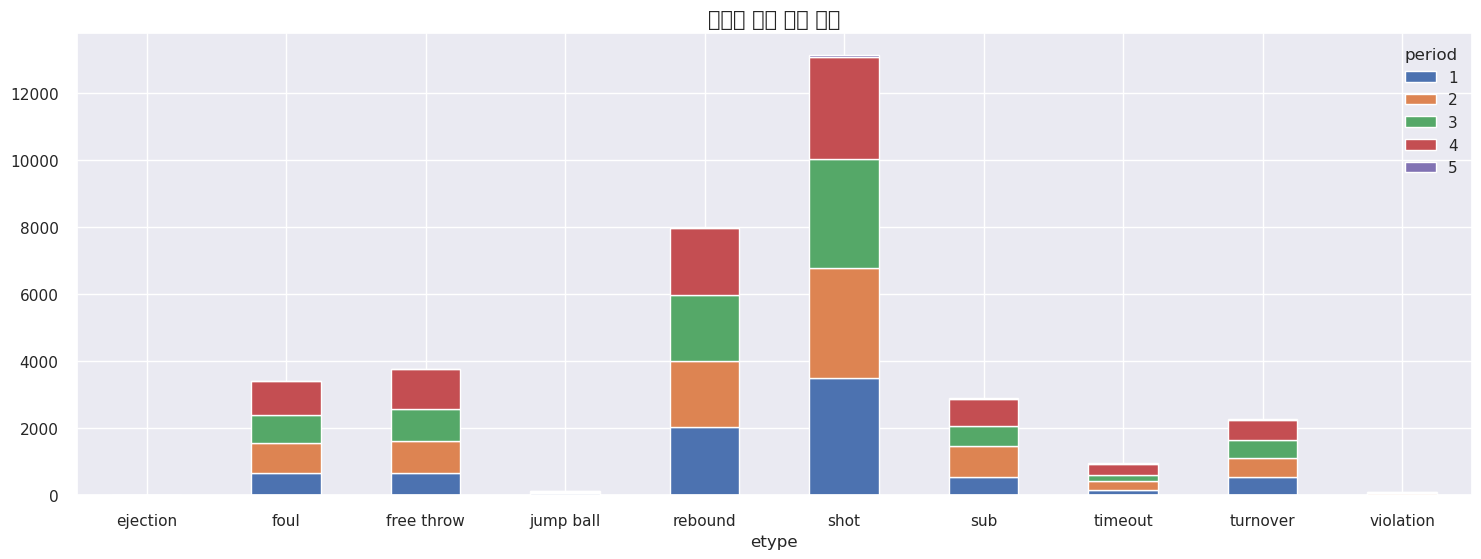

In [82]:
# stack plot 그리기
df2.plot(kind='bar', stacked=True, figsize=(18,6))
plt.title('쿼터별 행동 발생 횟수',size=15)
plt.xticks(rotation=0)

plt.show()

#### 4-3. 경기 결과 집계하고 시계열 그래프로 그리기

In [83]:
# 날짜별 경기 결과를 group by로 계산
# 결과 컬럼에서 성공 시 득점만 더하면 경기의 총 점수가 나온다.
made = df['result'].isin(['made'])
df[made].head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,0.0,0.0,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00


In [84]:
# 날짜별 팀별 슛 성공 건수 집계
df3 = df[made][['date','team','points']].groupby(['date','team'], as_index=True).sum()
df3

points
date       team        
2008-10-28 LAL       96
           POR       76
2008-10-29 LAC       79
           LAL      117
2008-11-01 DEN       97
...                 ...
2009-04-10 POR      106
2009-04-12 LAL       92
           MEM       75
2009-04-14 LAL      125
           UTA      112

[156 rows x 1 columns]

In [85]:
# reset index 사용
df3.reset_index(inplace=True)
df3

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [86]:
# Lakers와 상대편으로 경기 결과 나누기
lal = df3[df3['team'] == 'LAL']
opp = df3[df3['team'] != 'LAL']

In [87]:
lal

,date,team,points
0,2008-10-28,LAL,96
3,2008-10-29,LAL,117
5,2008-11-01,LAL,104
7,2008-11-05,LAL,106
9,2008-11-09,LAL,111
...,...,...,...
146,2009-04-07,LAL,122
149,2009-04-09,LAL,116
150,2009-04-10,LAL,98
152,2009-04-12,LAL,92


In [88]:
opp

,date,team,points
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
4,2008-11-01,DEN,97
6,2008-11-05,LAC,88
8,2008-11-09,HOU,82
...,...,...,...
147,2009-04-07,SAC,104
148,2009-04-09,DEN,102
151,2009-04-10,POR,106
153,2009-04-12,MEM,75


In [89]:
# 경기 결과를 가로 방향으로 붙이기
# pd.merge 함수 사용 : 붙일 떄 key는 날짜로 설정
df4 = pd.merge(lal,opp, on='date')
df4

,date,team_x,points_x,team_y,points_y
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [92]:
# Lakers가 이긴 날과 진날을 고르자
win = df4[df4['points_x'] > df4['points_y']]
lose = df4[df4['points_x'] < df4['points_y']]

print('Lakers는 총 {}회 경기 중, {}번 우승했다.'.format(df4.shape[0], win.shape[0]))

Lakers는 총 78회 경기 중, 63번 우승했다.


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


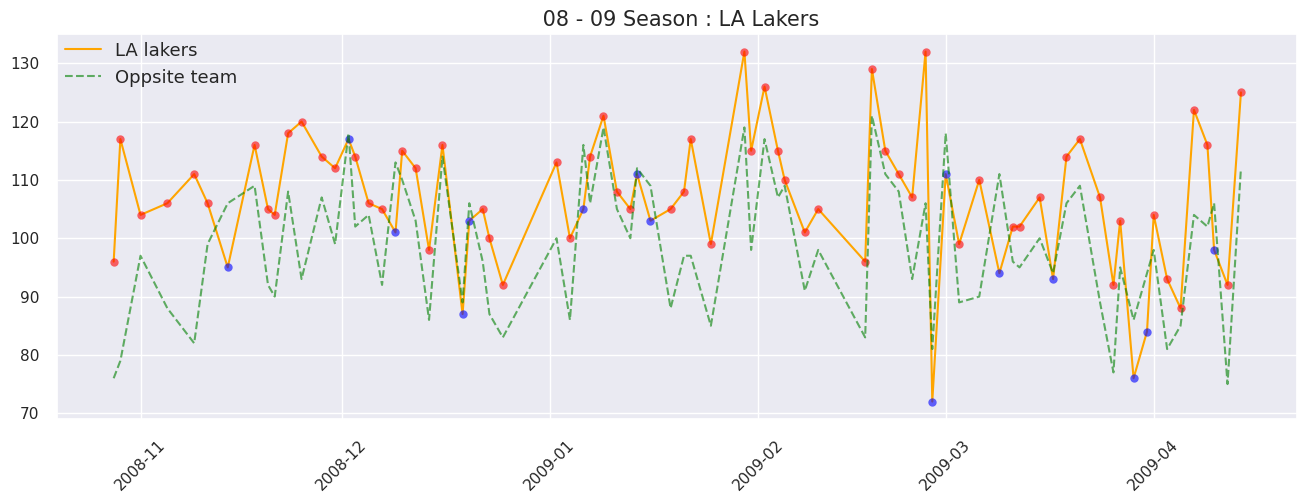

In [95]:
# 경기 결과 시계열 그래프로 확인
plt.figure(figsize=(16,5))

plt.title(' 08 - 09 Season : LA Lakers', fontsize=15)

# Lakers 점수를 오렌지 실선으로 표현
plt.plot(lal['date'], lal['points'], '-', alpha=1, color='orange', label='LA lakers')

# Lakers의 승리는 빨간 점, 진 날은 파란점으로 표시
plt.plot(win['date'], win['points_x'], 'o', alpha=.6, color='red')
plt.plot(lose['date'], lose['points_x'], 'o', alpha=.6, color='blue')

# 상대 팀 점수를 초록색 점선으로 표기
plt.plot(opp['date'], opp['points'], '--', alpha=.6, color='green', label='Oppsite team')

plt.legend(loc='upper left', borderaxespad=0, fontsize=13)
plt.xticks(rotation=45)

plt.show()

#### 4-4. Lakers 팀의 코드 위치별 행동

In [97]:
# Lakers의 데이터만 가져오기 
lal2 = df[df['team'] == 'LAL']
lal2

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34617,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,2009-04-14 00:42:00
34621,2009-04-14,UTA,home,0:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,0.0,0.0,2009-04-14 00:27:00


c:\Users\hwan\anaconda3\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


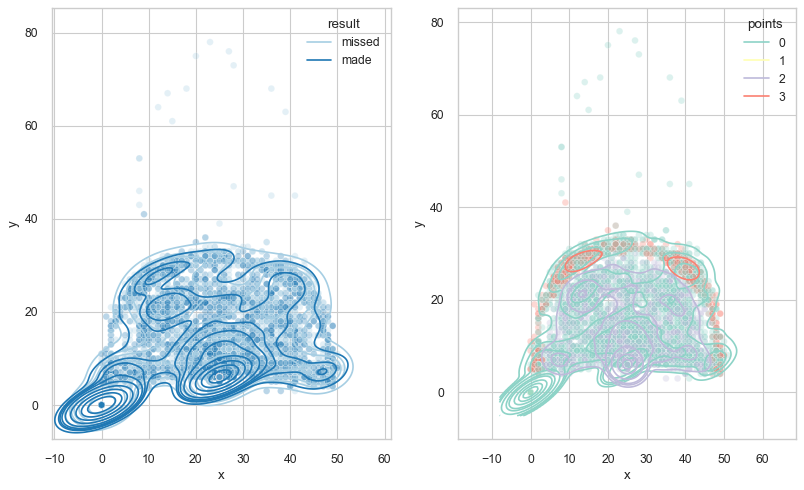

In [101]:
#슛한 위치 확인하기
# 득점은 어느 위치에서 발생하였는가 ?
sns.set_style('whitegrid')
f, ax = plt.subplots(1, 2, figsize=(12,7), dpi = 80)

#득점 성공 /실패 분포
g1 = sns.scatterplot(data=lal2, x='x', y='y', hue='result', alpha = 0.3, palette='Paired', ax=ax[0])
g2 = sns.kdeplot(data=lal2, x='x', y='y', hue='result', palette='Paired', ax=ax[0])

# 득점 점수 별 분포
g3 = sns.scatterplot(data=lal2, x='x', y='y', hue='points', alpha = 0.3, palette='Set3', ax=ax[1])
g4 = sns.kdeplot(data=lal2, x='x', y='y', hue='points', palette='Set3', ax=ax[1])

plt.show()

# x,y의 Null 값을 0으로 처리해줬기 떄문에 0 근처에 쏠림이 생겼다.
# x,y 값은 0으로 넣을 필요가 없다.

In [102]:
# 세부 행동 별 슛의 위치 확인
# 가장 많이 한 세부 행동 10개 고르기
lal3 = lal2[lal2['type'].isin(lal2['type'].value_counts().head(10).index)]
lal3

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,2009-04-14,UTA,home,2:12,4,shot,LAL,Jordan Farmar,missed,0,jump,40.0,7.0,2009-04-14 02:12:00
34605,2009-04-14,UTA,home,2:06,4,foul,LAL,Jordan Farmar,NaN,0,shooting,0.0,0.0,2009-04-14 02:06:00
34611,2009-04-14,UTA,home,1:27,4,rebound,LAL,Josh Powell,NaN,0,def,0.0,0.0,2009-04-14 01:27:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,2009-04-14 00:42:00


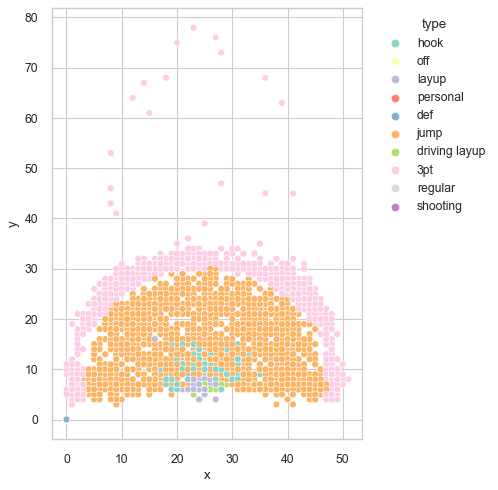

In [104]:
# 세부 행동 별 위치 확인하기
sns.set_style('whitegrid')
f , ax = plt.subplots(1, 1, figsize=(5,7), dpi=80)

sns.scatterplot(data=lal3, x='x', y='y', hue=lal3['type'], palette='Set3', ax=ax)

# 범례가 10개이기 때문에 그래프 안에 넣으면 혼란스러우므로 옆으로 분리
ax.legend(title='type', bbox_to_anchor=(1.03,1))

plt.show()

### 5. Review

- Lakers의 데이터는:<br>
총 데이터 개수 : 450112<br>
총 결측치 수 : 76625 = 전체 데이터의 17.02%<br>
Lakers 상대 팀 : 28
행동 수 : 10
세부 행동 수 : 73

- Lakers Home / Away 비중 <br>
홈 어웨이를 1:1 비율로 치뤘다.

- 경기 중 가장 많이 하는 etype은 ? : 슛 비중이 제일 높고 그 다음은 리바운드

- 이번 시즌 Lakers의 경기 결과는<br>
총 78회 경기 중 63번 우승

- Lakers의 선수들은 어느 위치에서 어떤 동작을 했는가 ? <br>
상대 편 골대 기준 왼쪽에서 슛을 했을 때 득점 확률이 더 높았다. 

- 추가 분석 포인트<br>
x,y 좌표 Null 값에 Null을 넣지 않는 것이 분석에 더 좋다. <br>
특정 선수의 행동 패턴 분석
